# Exploratory Data Analysis (EDA) for Customer Churn

**Objective:** This notebook performs an initial investigation on the customer churn dataset. The goals are to:

1.  Understand the structure and data types of the features.
2.  Identify missing values and potential data quality issues.
3.  Analyze the distribution of individual features (univariate analysis).
4.  Explore relationships between different features and the target variable, 'Churn' (bivariate analysis).
5.  Summarize key findings that can inform the feature engineering and modeling stages.

## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Determine the project root and construct the path to the raw data
# This assumes the notebook is in a 'notebooks' directory at the project root
try:
    project_root = Path(__file__).parent.parent
except NameError:
    # Fallback for interactive environments like Jupyter
    project_root = Path.cwd().parent

RAW_DATA_FILE = project_root / 'data' / 'raw' / 'customer_accounts.csv'

if not RAW_DATA_FILE.exists():
    print(f"Error: {RAW_DATA_FILE} not found.")
    print("Please run 'src/generate_csv_data.py' first.")
else:
    df = pd.read_csv(RAW_DATA_FILE)
    print(f"Successfully loaded data from {RAW_DATA_FILE}")
    print(f"Dataset shape: {df.shape}")

Successfully loaded data from d:\Prasanna\Learning\M.TECH BITS\vscode\MS-Portfolio\DMML\Customer_churn_analysis\data\raw\customer_accounts.csv
Dataset shape: (1000, 21)


## 2. Initial Data Inspection

In [3]:
# Display the first few rows of the dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6417e8e5-225d-42f8-ba2b-9d5fa8cce0d2,Female,1,No,No,54,Yes,No,Fiber optic,Yes,...,Yes,No internet service,Yes,Yes,Two year,No,Mailed check,50.11,6263.70,No
1,249ec63b-ee8e-4429-a659-ff80ecef24b9,Male,1,Yes,No,15,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,21.04,NaN,No
2,ceac5a42-2723-4720-a6d1-dd06bf09af29,Female,0,Yes,No,4,Yes,No,Fiber optic,No internet service,...,No,Yes,No internet service,No,Month-to-month,Yes,Credit card (automatic),48.80,3412.10,Yes
3,d93fe0f0-6fce-4549-90c7-564e39b7ae74,Female,1,No,No,15,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,92.37,4919.34,Yes
4,45755e1b-2295-4bbb-b0d3-4cbd5094e73b,Female,0,No,No,31,Yes,No,Fiber optic,Yes,...,No internet service,No internet service,Yes,No,Two year,No,Bank transfer (automatic),58.01,4436.84,No


In [4]:
# Get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1000 non-null   object 
 1   gender            1000 non-null   object 
 2   SeniorCitizen     1000 non-null   int64  
 3   Partner           1000 non-null   object 
 4   Dependents        1000 non-null   object 
 5   tenure            1000 non-null   int64  
 6   PhoneService      1000 non-null   object 
 7   MultipleLines     1000 non-null   object 
 8   InternetService   1000 non-null   object 
 9   OnlineSecurity    1000 non-null   object 
 10  OnlineBackup      1000 non-null   object 
 11  DeviceProtection  1000 non-null   object 
 12  TechSupport       1000 non-null   object 
 13  StreamingTV       1000 non-null   object 
 14  StreamingMovies   1000 non-null   object 
 15  Contract          1000 non-null   object 
 16  PaperlessBilling  1000 non-null   object 
 

The `TotalCharges` column is incorrectly typed as `object` and should be numeric. It also contains missing values, which we will handle.

In [5]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN (which handles empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        50
Churn                0
dtype: int64

In [6]:
# Get descriptive statistics for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.000000,950.000000
mean,0.172000,31.127000,68.695840,4334.558400
std,0.377569,20.048961,29.222153,2497.017546
min,0.000000,1.000000,18.270000,19.610000
25%,0.000000,15.000000,44.607500,2244.840000
50%,0.000000,28.000000,68.845000,4290.315000
75%,0.000000,47.000000,94.217500,6420.590000
max,1.000000,72.000000,118.480000,8679.040000


## 3. Univariate Analysis

### Target Variable: Churn

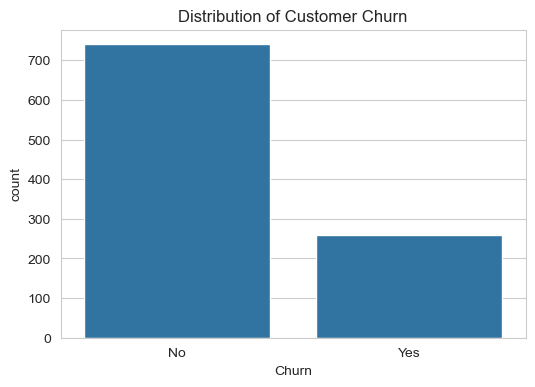

Churn Distribution:
Churn
No     74.0
Yes    26.0
Name: proportion, dtype: float64


In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.show()

churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print(f"Churn Distribution:\n{churn_percentage}")

The dataset is imbalanced, with about 26-27% of customers having churned. This is important to consider during modeling (e.g., using stratified sampling or specific evaluation metrics like F1-score).

### Categorical Features

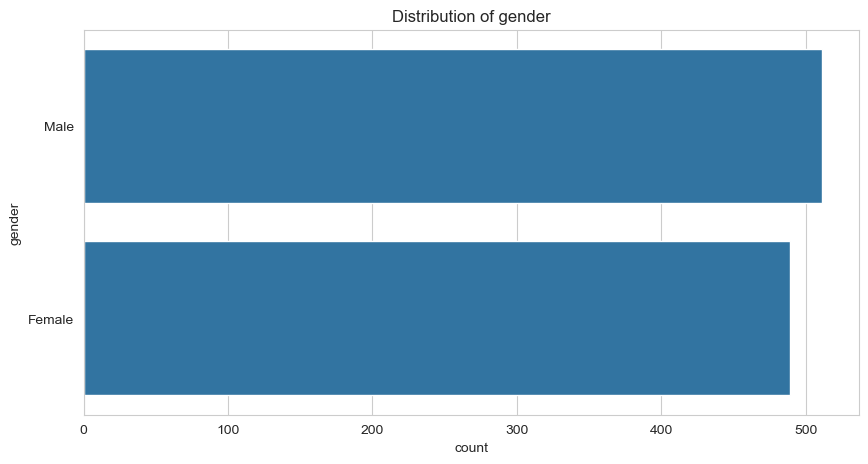

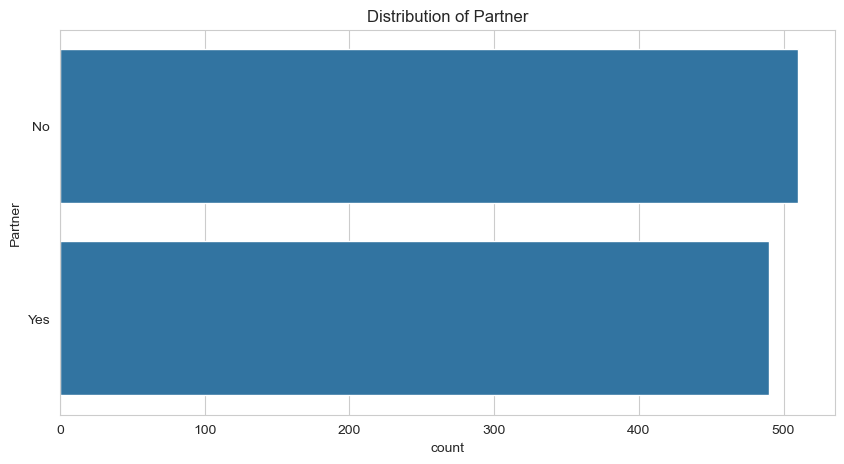

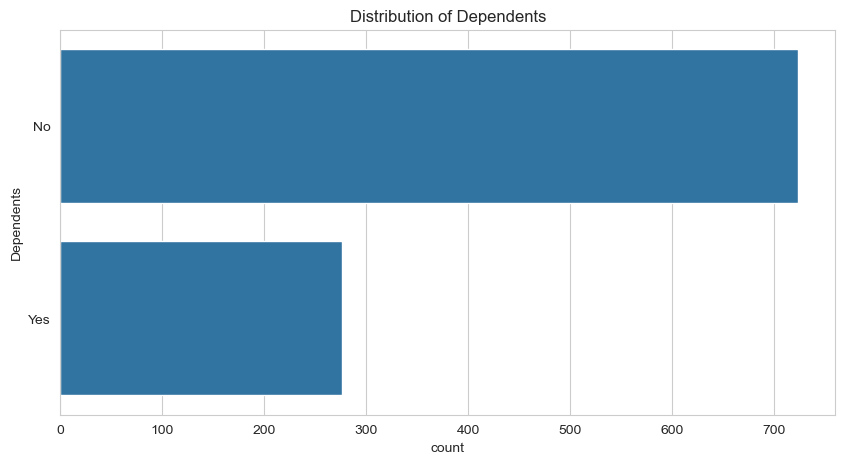

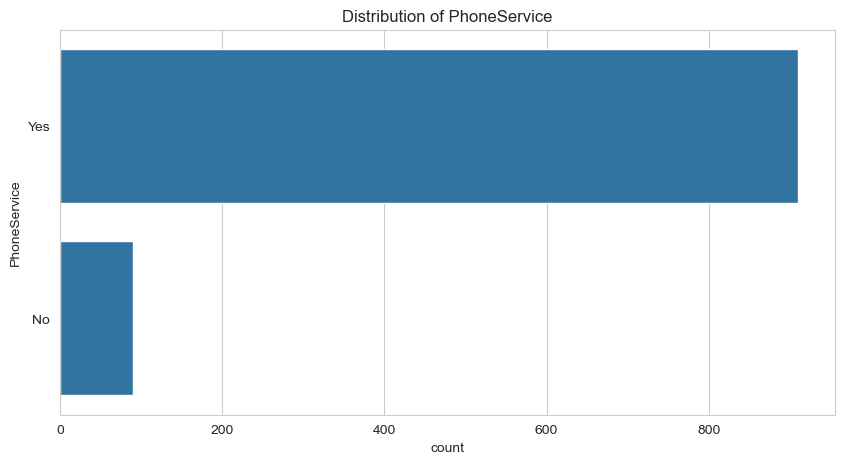

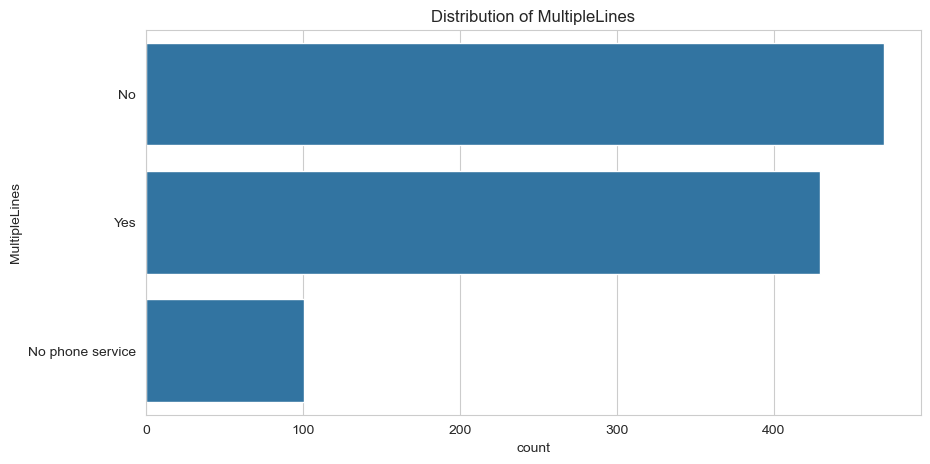

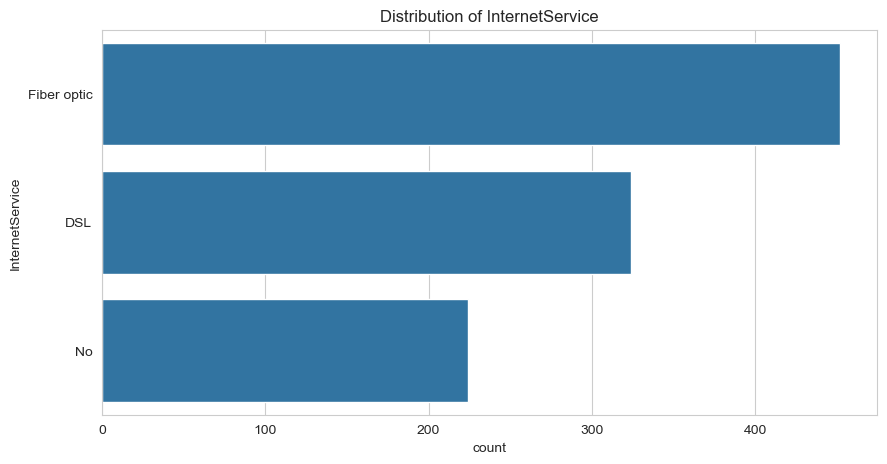

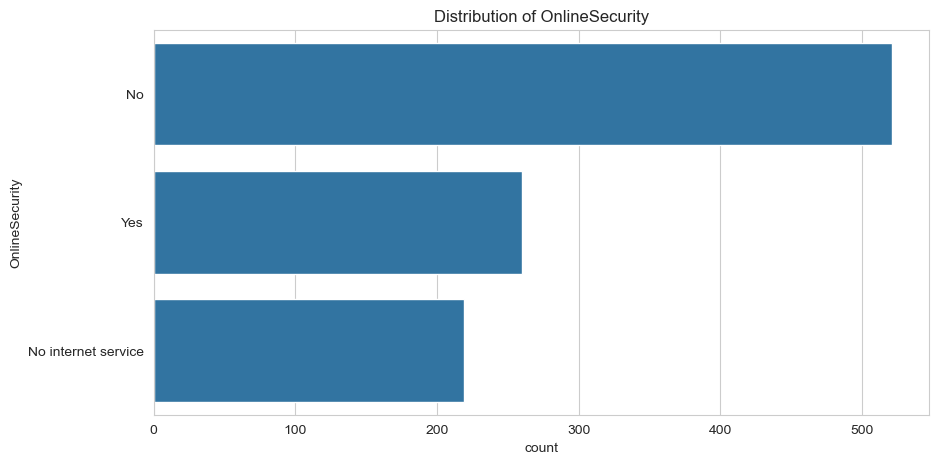

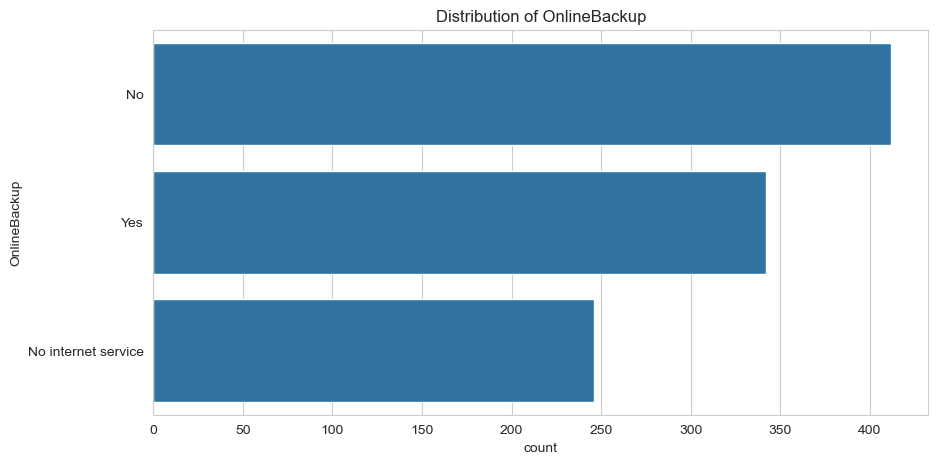

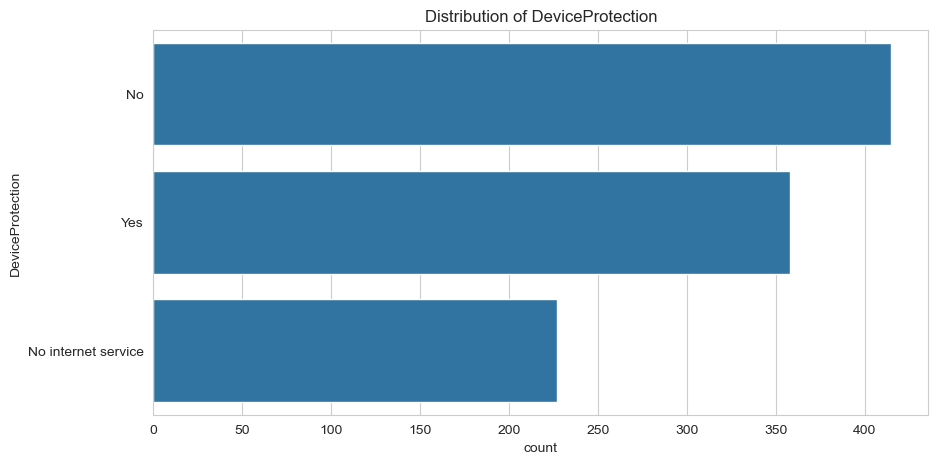

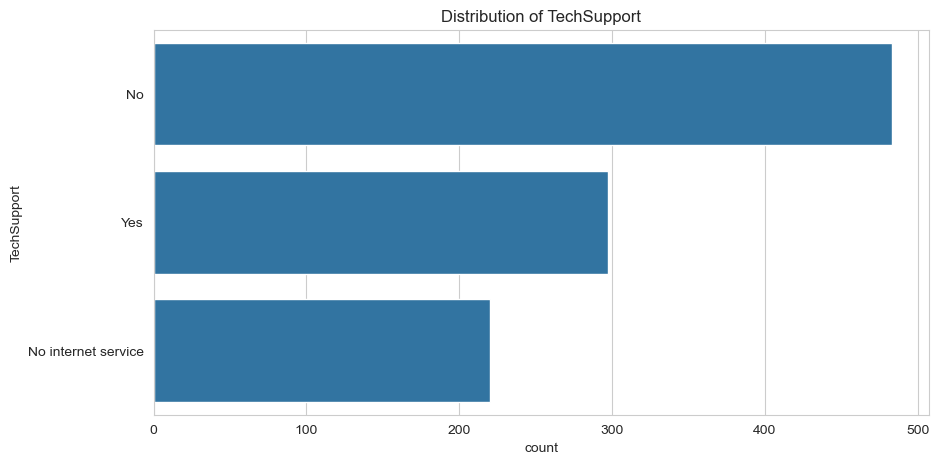

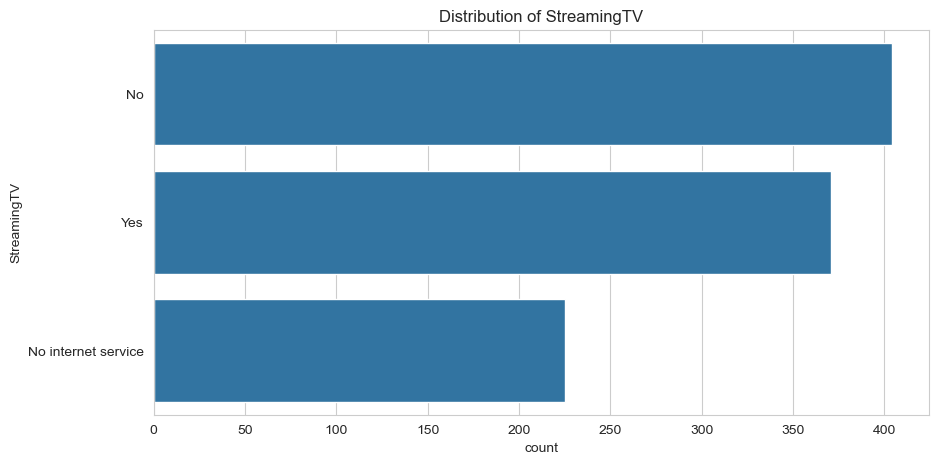

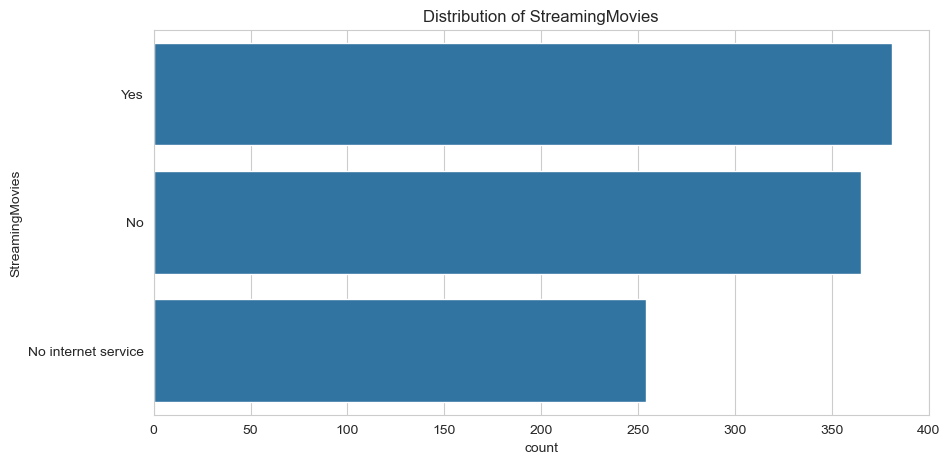

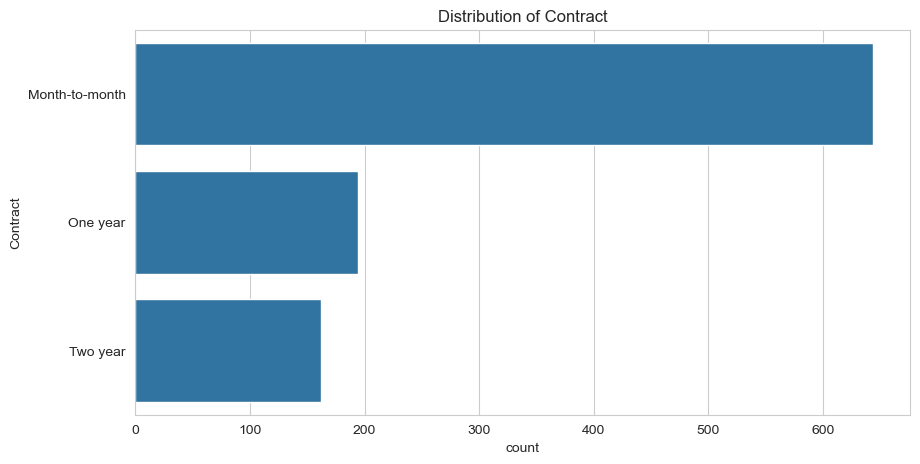

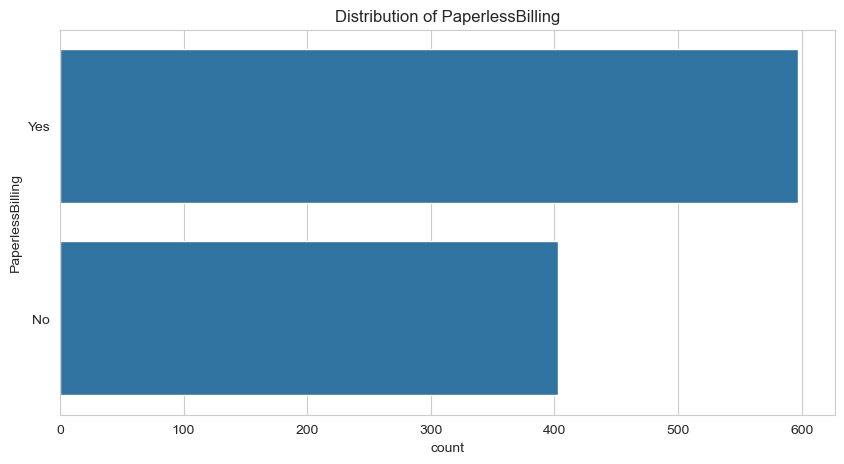

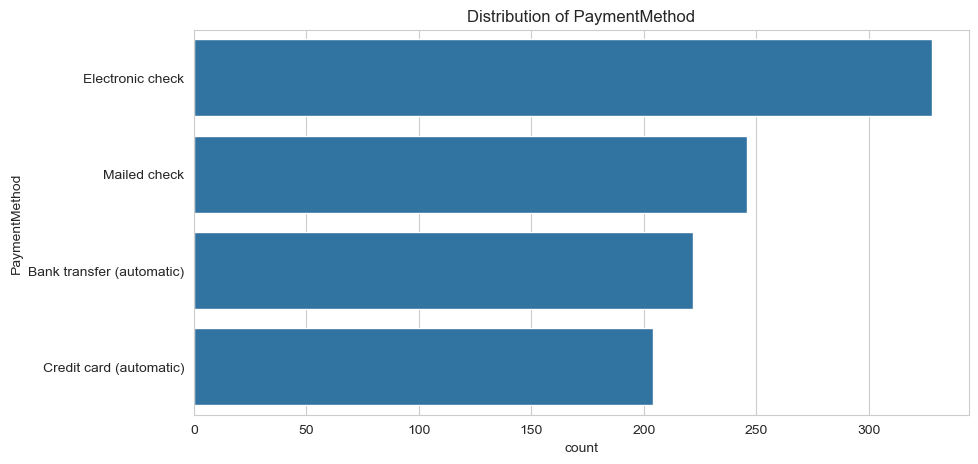

In [8]:
categorical_features = df.select_dtypes(include=['object']).columns.drop('customerID')

for feature in categorical_features:
    if feature != 'Churn':
        plt.figure(figsize=(10, 5))
        sns.countplot(y=feature, data=df, order=df[feature].value_counts().index)
        plt.title(f'Distribution of {feature}')
        plt.show()

### Numerical Features

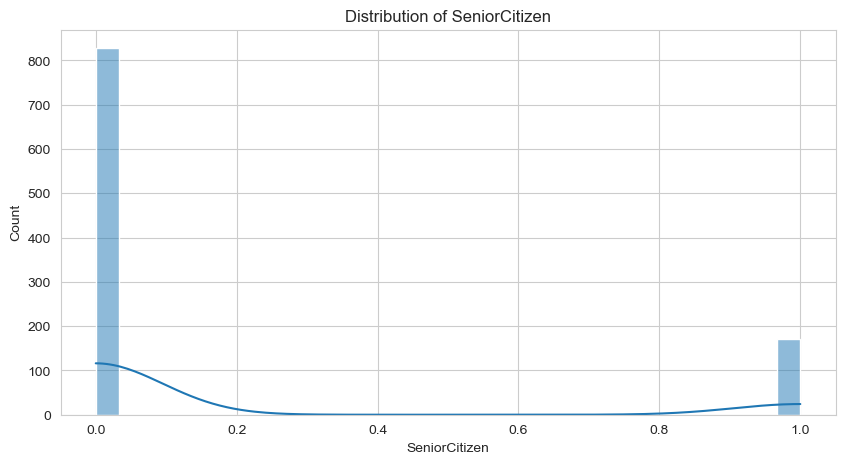

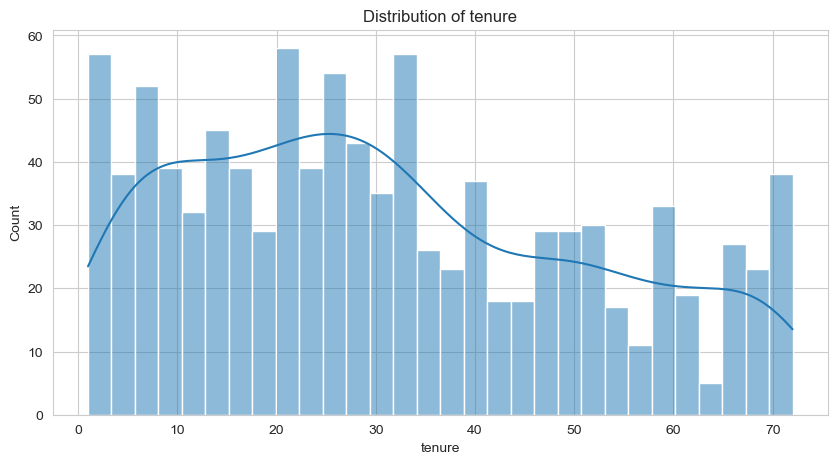

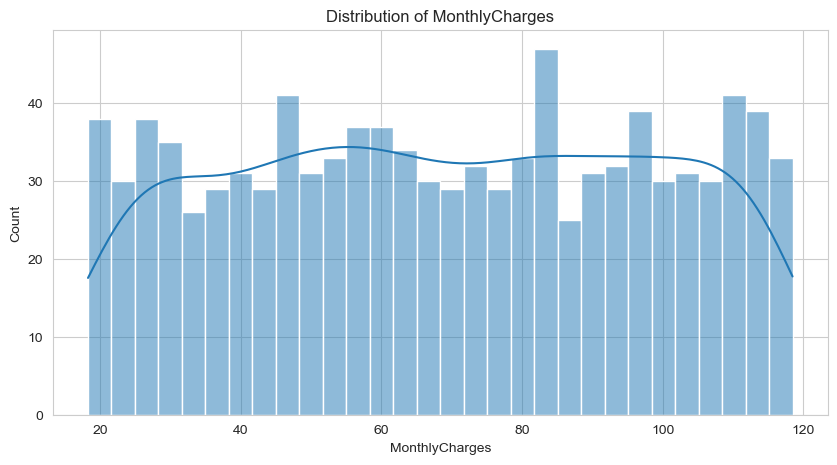

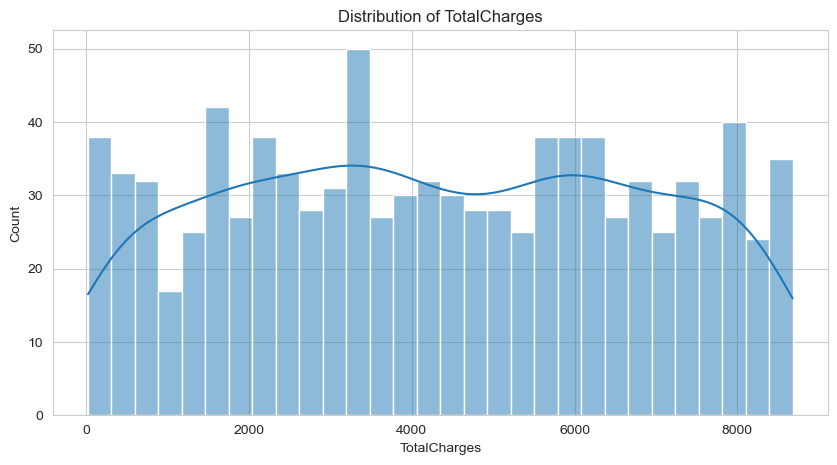

In [9]:
numerical_features = df.select_dtypes(include=np.number).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

## 4. Bivariate Analysis (Relationship with Churn)

### Categorical Features vs. Churn

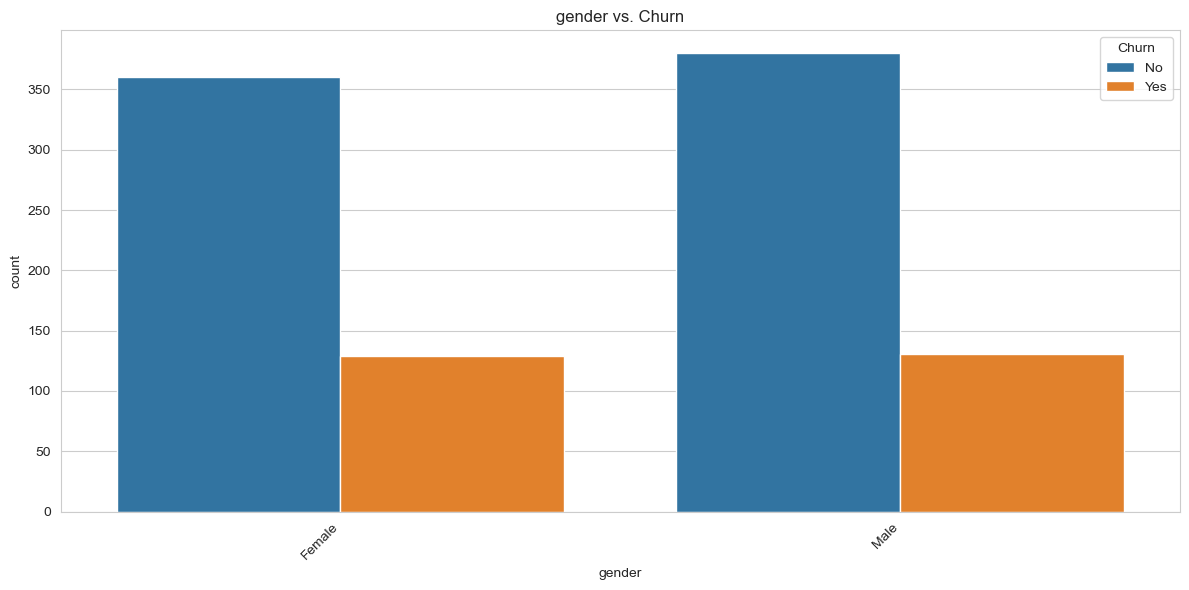

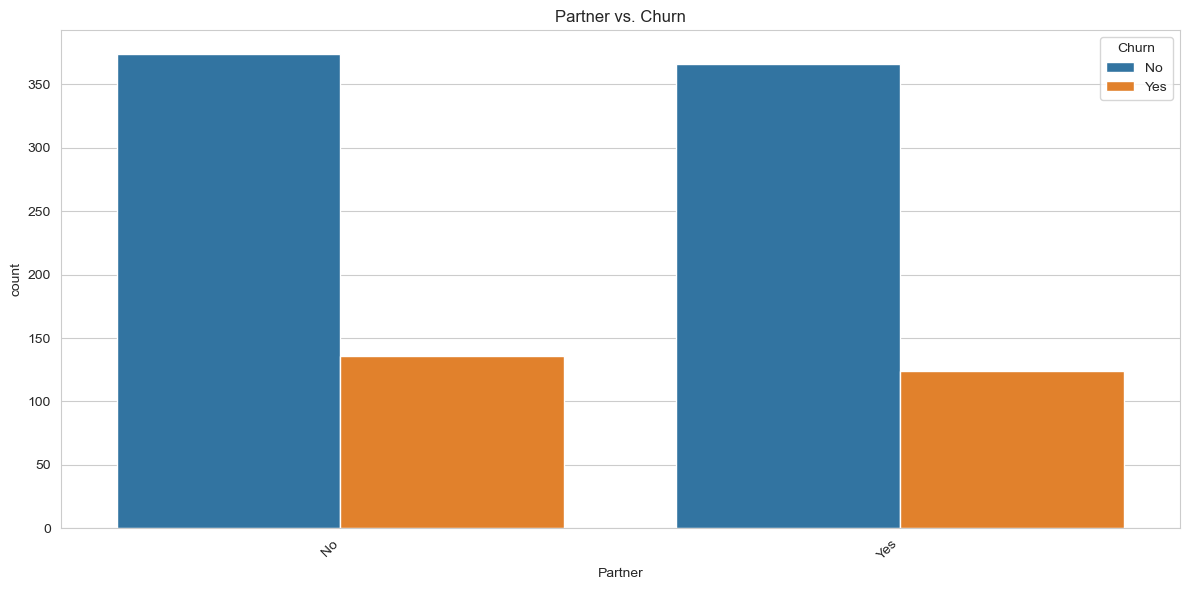

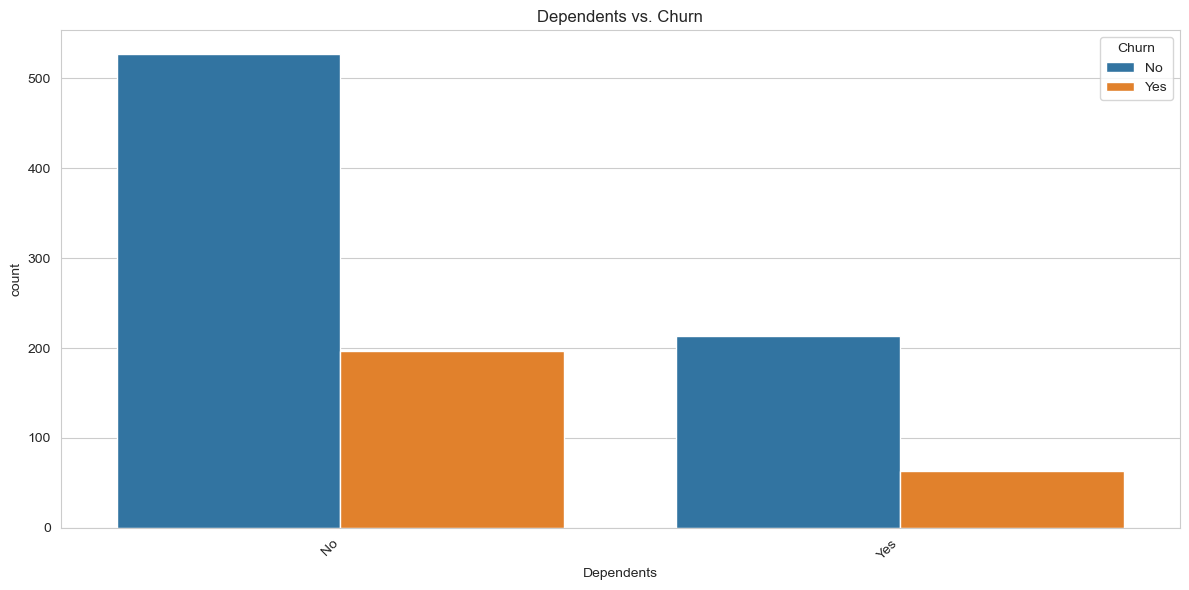

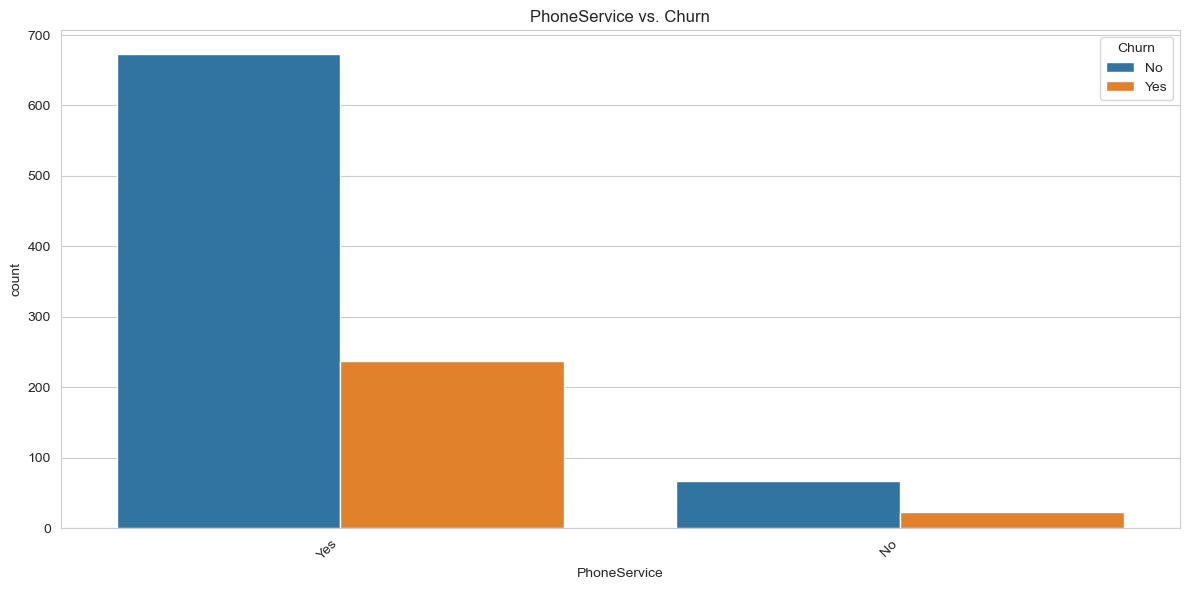

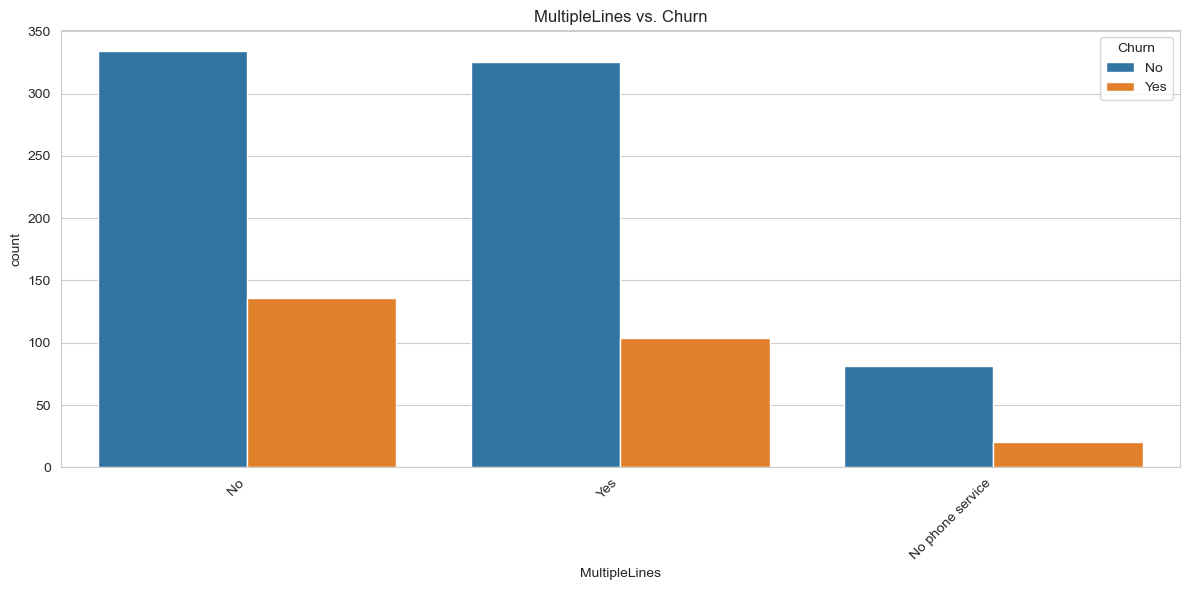

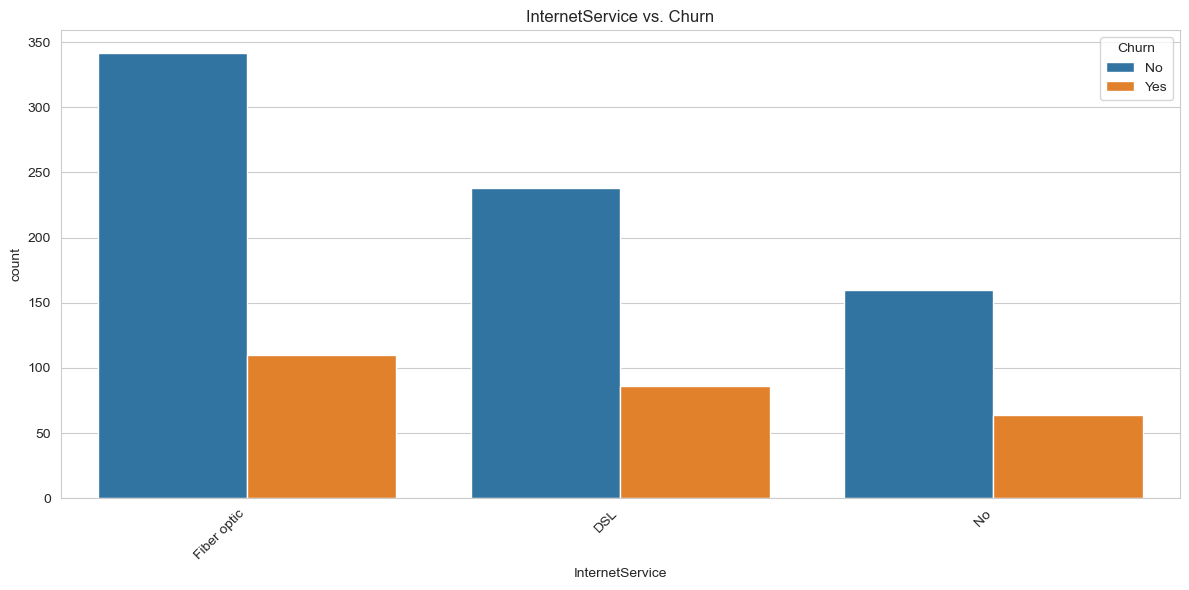

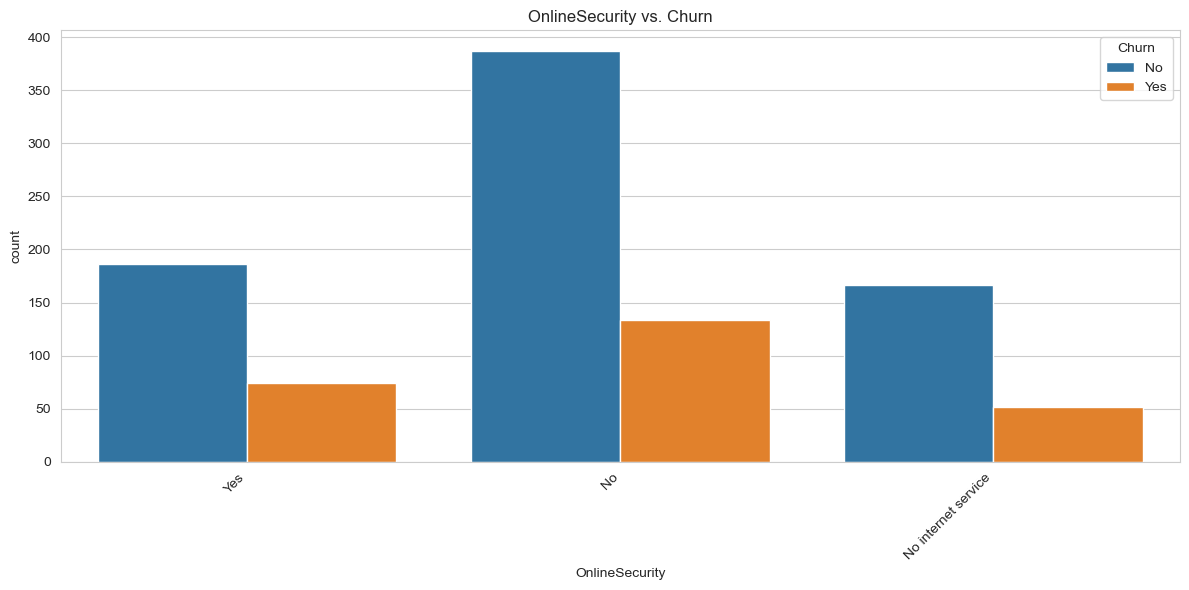

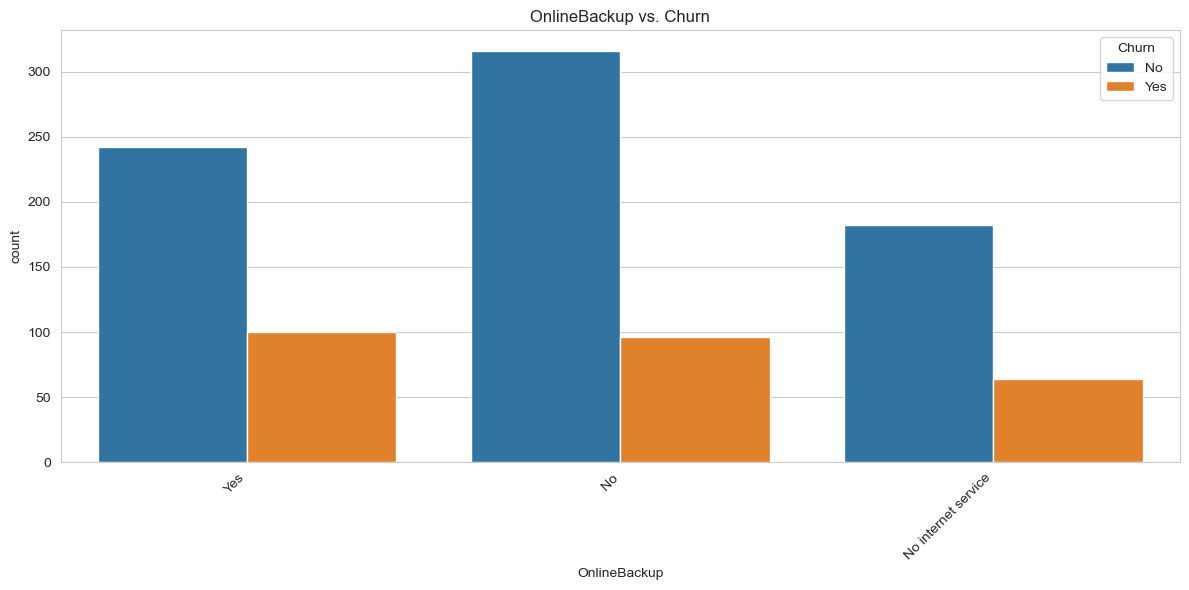

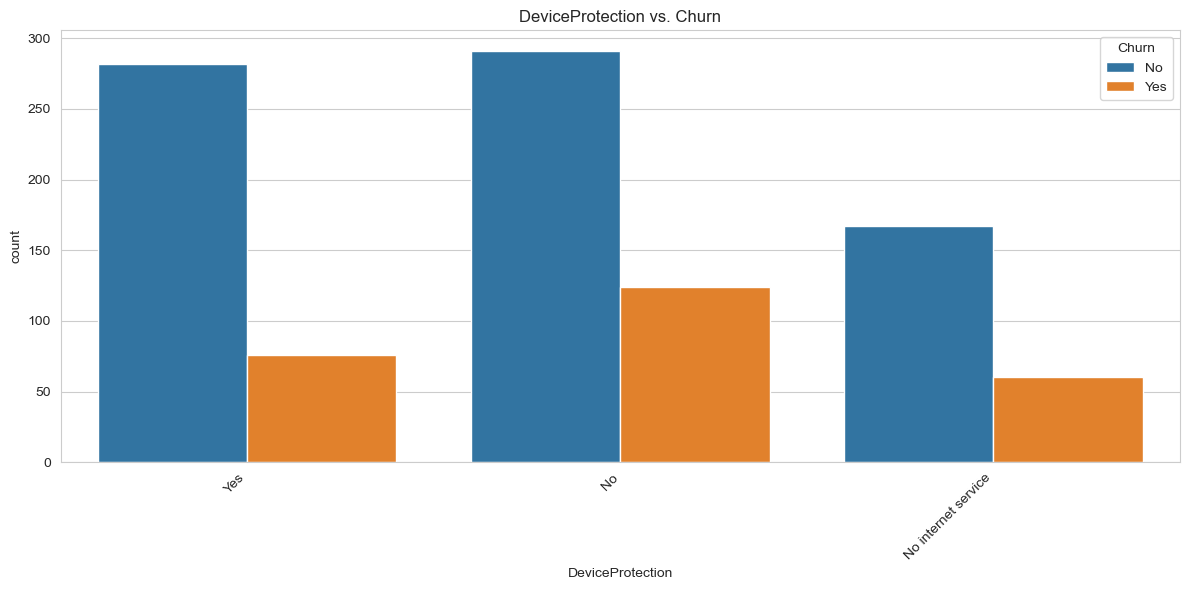

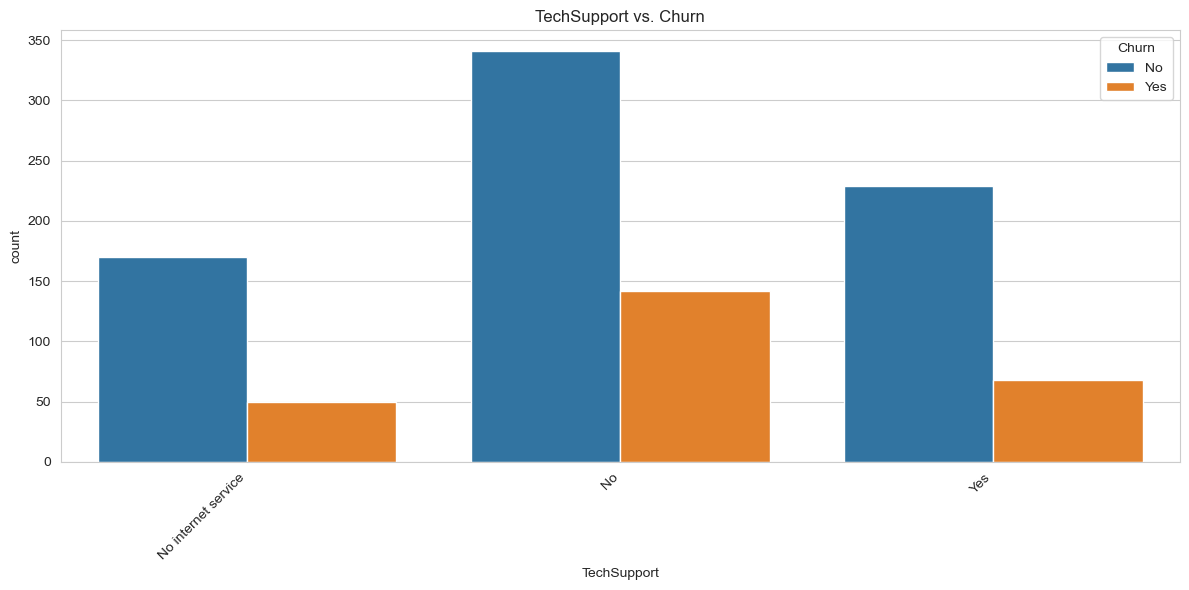

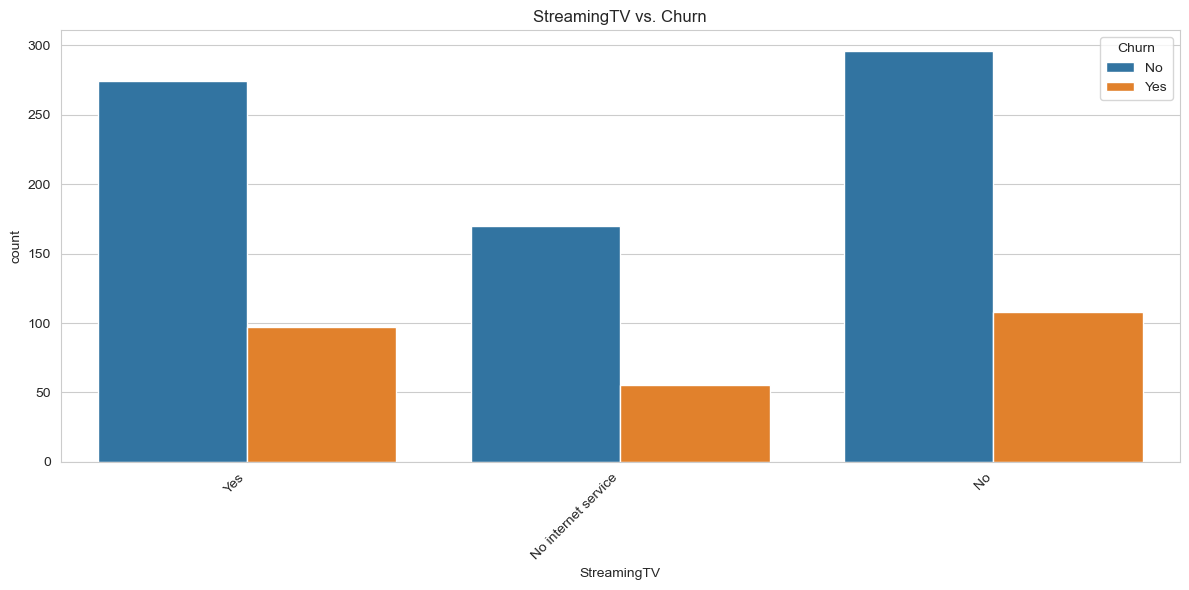

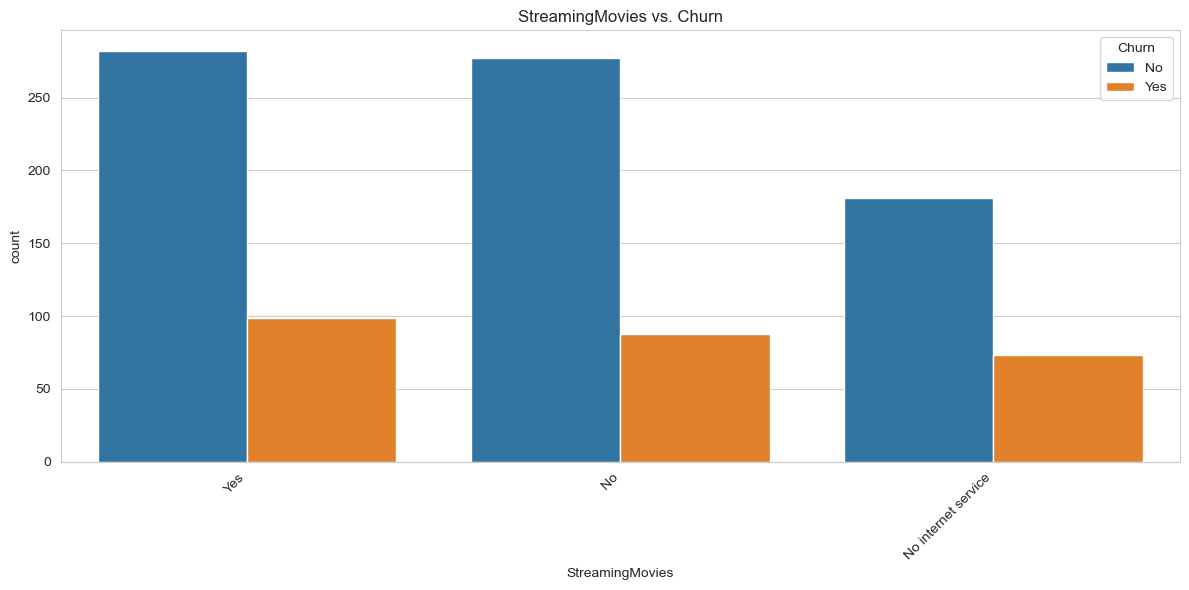

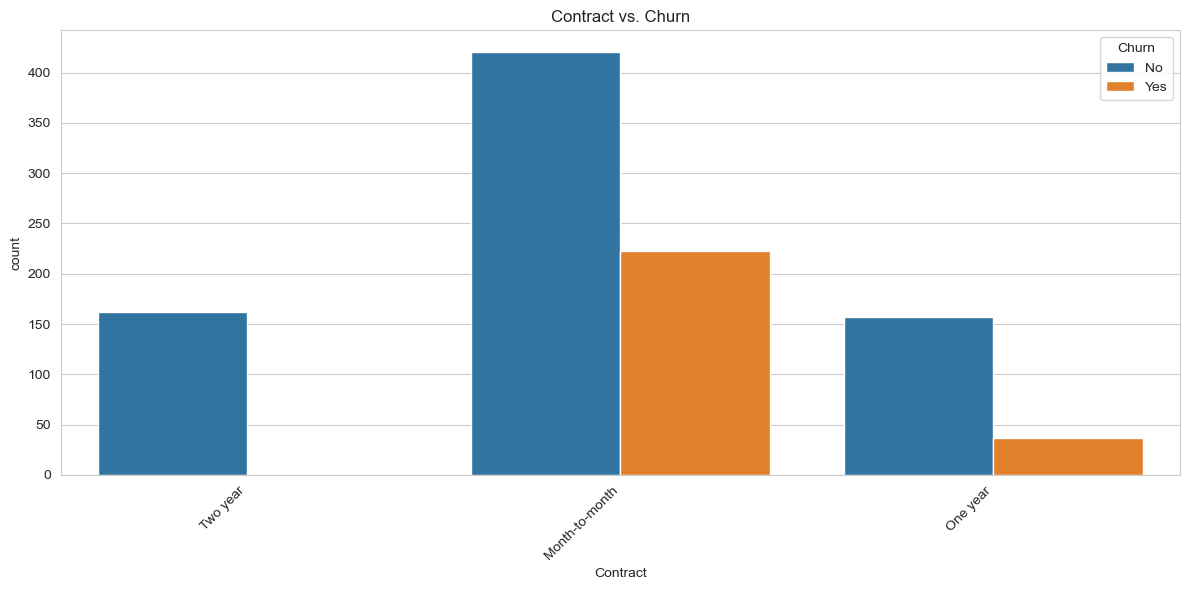

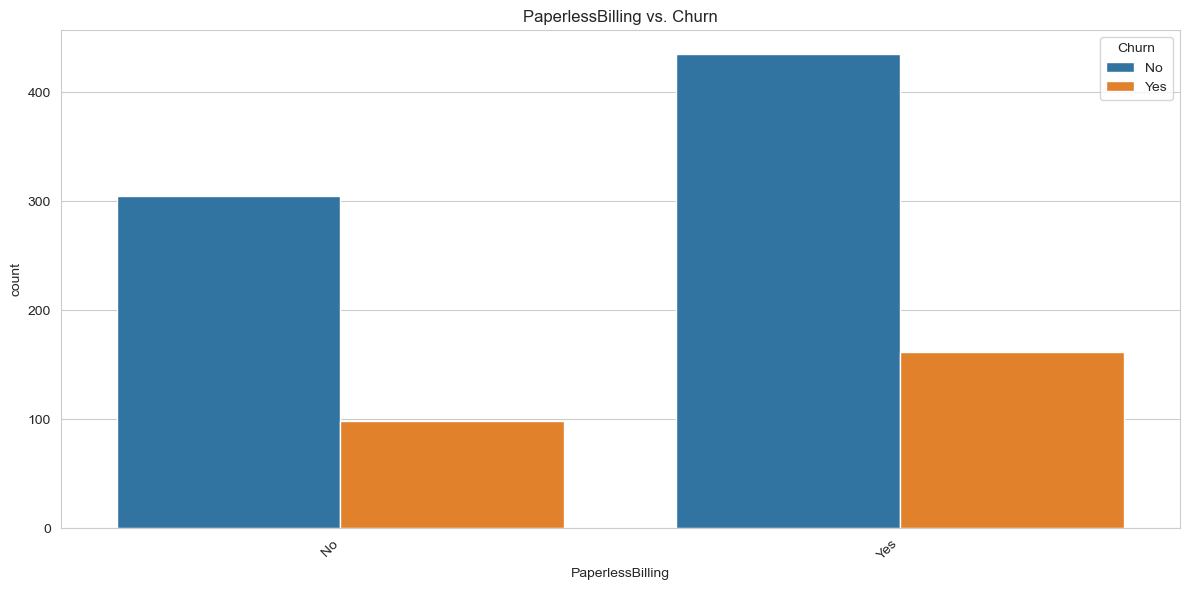

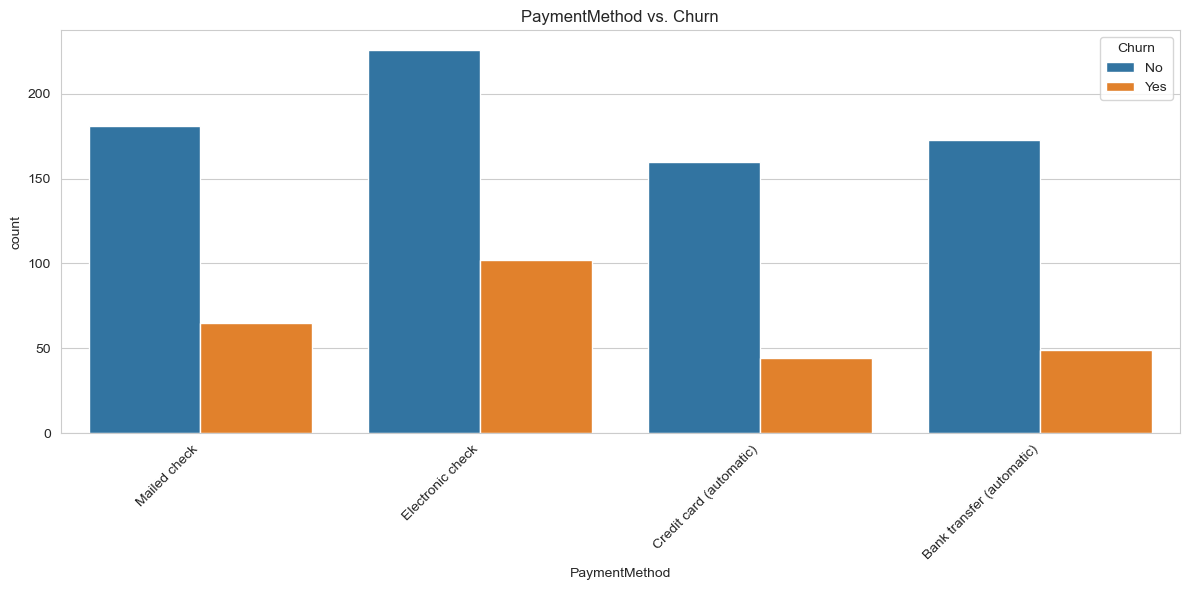

In [10]:
for feature in categorical_features:
    if feature != 'Churn':
        plt.figure(figsize=(12, 6))
        sns.countplot(x=feature, hue='Churn', data=df)
        plt.title(f'{feature} vs. Churn')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

**Key Observations:**
- **Contract:** Customers with Month-to-month contracts are far more likely to churn.
- **Internet Service:** Customers with Fiber optic internet have a higher churn rate.
- **Online Security / Tech Support:** Customers *without* these services tend to churn more.

### Numerical Features vs. Churn

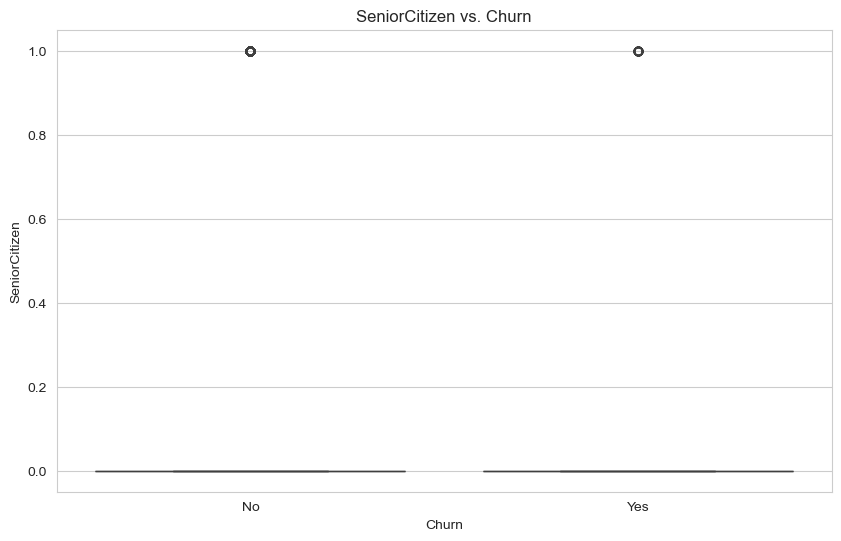

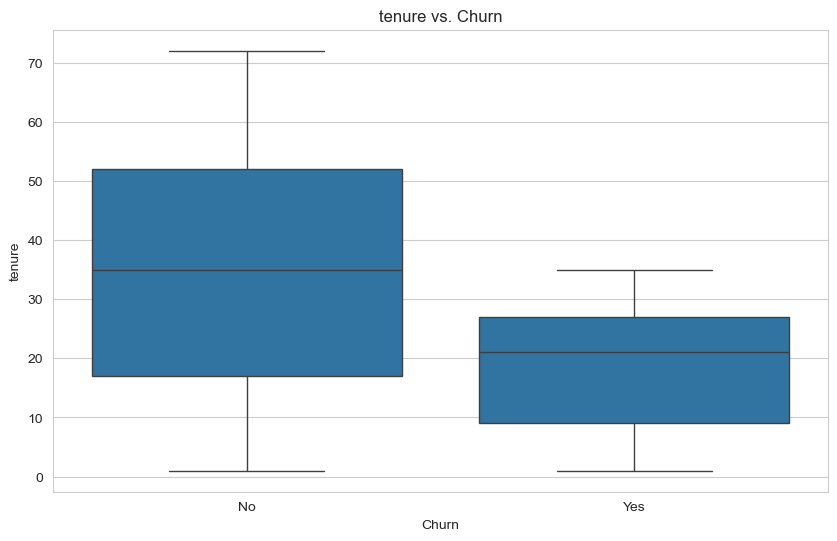

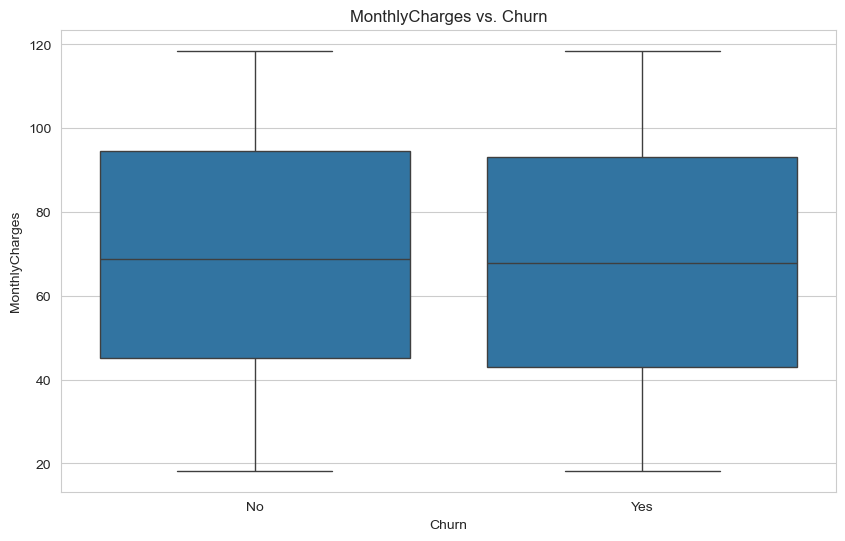

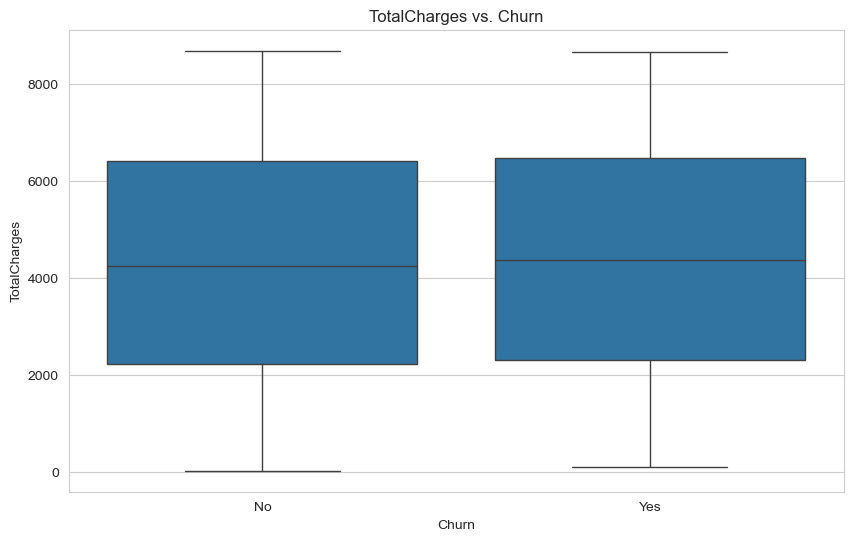

In [11]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} vs. Churn')
    plt.show()

**Key Observations:**
- **Tenure:** Customers who churn have a significantly lower tenure.
- **Monthly Charges:** Customers who churn tend to have higher monthly charges.

## 5. Correlation Analysis

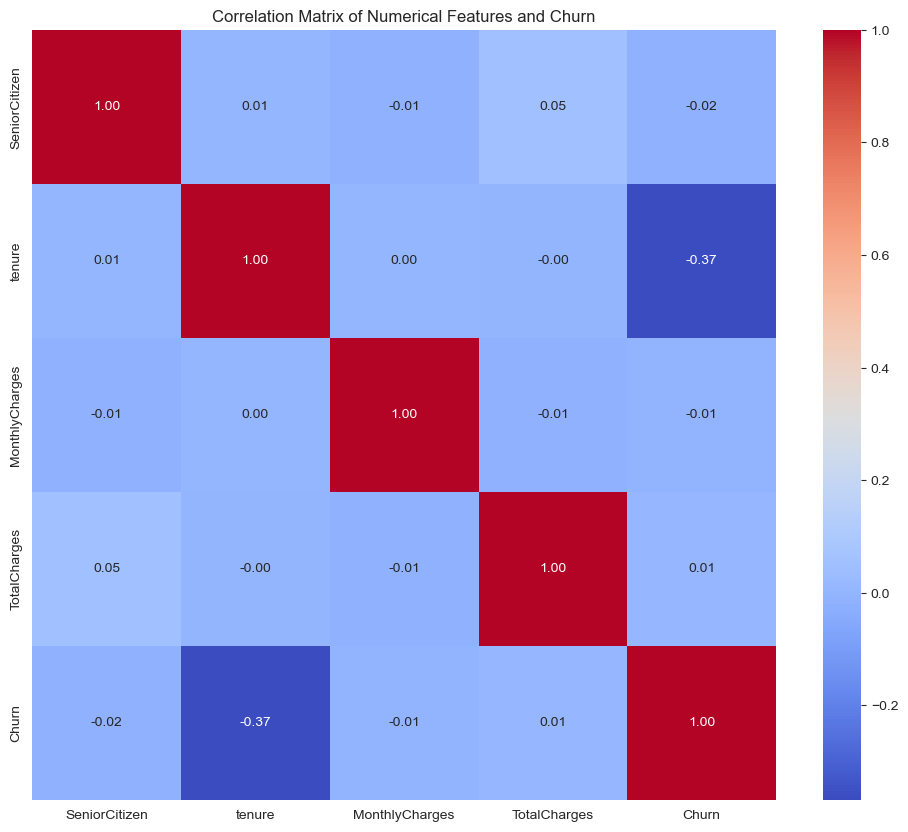

In [12]:
# Create a copy for correlation analysis and encode 'Churn' numerically
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(12, 10))
correlation_matrix = df_corr[numerical_features.tolist() + ['Churn']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features and Churn')
plt.show()

**Key Observations:**
- `tenure` and `TotalCharges` are highly positively correlated, which is expected.
- `MonthlyCharges` and `tenure` have a moderate positive correlation.
- `Churn` is negatively correlated with `tenure` (longer tenure, less churn) and positively correlated with `MonthlyCharges` (higher charges, more churn).

## 6. Summary of Findings

1.  **Data Quality:** The `TotalCharges` column needs to be converted to a numeric type, and its missing values must be handled (imputation with the median or mean seems appropriate).
2.  **Key Churn Indicators:**
    -   **Contract Type:** Month-to-month contracts are a major driver of churn.
    -   **Tenure:** New customers (low tenure) are at a high risk of churning.
    -   **Add-on Services:** Lack of services like `OnlineSecurity` and `TechSupport` is associated with higher churn.
    -   **Monthly Charges:** Higher monthly charges correlate with higher churn.
3.  **Feature Engineering:** The strong relationship between churn and contract type, tenure, and specific services suggests that creating interaction features or more complex features based on these could be very beneficial for the model.